<a href="https://colab.research.google.com/github/GeneGenius/DataScienceJourney/blob/main/Data_Mining_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Mining with Python

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
#uploaded = files.upload()
# %cd /Colab_Notebooks

Mounted at /content/drive


In [ ]:
file = r'/content/drive/MyDrive/Colab_Notebooks/Machine_Learning/single_family_home_values.csv'
df = pd.read_csv(file)

In [ ]:
df.head(10)

id                address    city state  zipcode   latitude  \
0   39525749        8171 E 84th Ave  Denver    CO    80022  39.849160   
1  184578398      10556 Wheeling St  Denver    CO    80022  39.888020   
2  184430015    3190 Wadsworth Blvd  Denver    CO    80033  39.761710   
3  155129946    3040 Wadsworth Blvd  Denver    CO    80033  39.760780   
4     245107        5615 S Eaton St  Denver    CO    80123  39.616181   
5    3523925       6535 W Sumac Ave  Denver    CO    80123  39.615136   
6   30560679       6673 W Berry Ave  Denver    CO    80123  39.616350   
7   39623928         5640 S Otis St  Denver    CO    80123  39.615213   
8  148975825         5342 S Gray St  Denver    CO    80123  39.620158   
9  184623176  4967 S Wadsworth Blvd  Denver    CO    80123  39.626770   

    longitude  bedrooms  bathrooms  rooms  squareFootage  lotSize  yearBuilt  \
0 -104.893468         3        2.0      6           1378     9968     2003.0   
1 -104.830930         2        2.0      6           1653     6970     2004.0   
2 -105.081070         3        1.0      0           1882    23875     1917.0   
3 -105.081060         4        3.0      0           2400    11500     1956.0   
4 -105.058812         3        4.0      8           2305     5600     1998.0   
5 -105.069018         3        5.0      7           2051     6045     1996.0   
6 -105.070760         4        4.0      8           2051     6315     1997.0   
7 -105.070617         3        3.0      7           2051     8133     1997.0   
8 -105.063094         3        3.0      7           1796     5038     1999.0   
9 -105.081990         3        3.0      0           2054     4050     2007.0   

  lastSaleDate  lastSaleAmount priorSaleDate  priorSaleAmount  estimated_value  
0   2009-12-17           75000    2004-05-13         165700.0           239753  
1   2004-09-23          216935           NaN              NaN           343963  
2   2008-04-03          330000           NaN              NaN           488840  
3   2008-12-02          185000    2008-06-27              0.0           494073  
4   2012-07-18          308000    2011-12-29              0.0           513676  
5   2006-09-12          363500    2005-05-16         339000.0           496062  
6   2014-12-15          420000    2006-07-07         345000.0           514953  
7   2004-03-15          328700    1998-04-09         225200.0           494321  
8   2011-08-16          274900    2011-01-10              0.0           496079  
9   2015-12-01          407000    2012-10-30         312000.0           424514

In [ ]:
df.shape

(15000, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   address          15000 non-null  object 
 2   city             15000 non-null  object 
 3   state            15000 non-null  object 
 4   zipcode          15000 non-null  int64  
 5   latitude         14985 non-null  float64
 6   longitude        14985 non-null  float64
 7   bedrooms         15000 non-null  int64  
 8   bathrooms        15000 non-null  float64
 9   rooms            15000 non-null  int64  
 10  squareFootage    15000 non-null  int64  
 11  lotSize          15000 non-null  int64  
 12  yearBuilt        14999 non-null  float64
 13  lastSaleDate     15000 non-null  object 
 14  lastSaleAmount   15000 non-null  int64  
 15  priorSaleDate    11173 non-null  object 
 16  priorSaleAmount  11287 non-null  float64
 17  estimated_va

In [ ]:
df.describe()


id       zipcode      latitude     longitude      bedrooms  \
count  1.500000e+04  15000.000000  14985.000000  14985.000000  15000.000000   
mean   5.176229e+07  80204.919467     39.740538   -104.964076      2.708400   
std    6.190876e+07      9.715263      0.023555      0.039788      0.897231   
min    1.433670e+05  80022.000000     39.614531   -105.108440      0.000000   
25%    1.004802e+07  80205.000000     39.727634   -104.978737      2.000000   
50%    2.563241e+07  80206.000000     39.748048   -104.957689      3.000000   
75%    5.114222e+07  80207.000000     39.758214   -104.937522      3.000000   
max    3.209481e+08  80209.000000     39.888020   -104.830930     15.000000   

          bathrooms         rooms  squareFootage       lotSize     yearBuilt  \
count  15000.000000  15000.000000   15000.000000   15000.00000  14999.000000   
mean       2.195067      6.164133    1514.504400    5820.76620   1929.517168   
std        1.166279      1.958601     830.635999    3013.27947     29.937051   
min        0.000000      0.000000     350.000000     278.00000   1874.000000   
25%        1.000000      5.000000     986.000000    4620.00000   1907.000000   
50%        2.000000      6.000000    1267.500000    5950.00000   1925.000000   
75%        3.000000      7.000000    1766.250000    6270.00000   1949.000000   
max       12.000000     39.000000   10907.000000  122839.00000   2016.000000   

       lastSaleAmount  priorSaleAmount  estimated_value  
count    1.500000e+04     1.128700e+04     1.500000e+04  
mean     4.053563e+05     2.594350e+05     6.371625e+05  
std      7.756998e+05     3.379387e+05     5.044185e+05  
min      2.590000e+02     0.000000e+00     1.477670e+05  
25%      1.940000e+05     1.100000e+05     3.984348e+05  
50%      3.200000e+05     2.100000e+05     5.183575e+05  
75%      4.632000e+05     3.302400e+05     6.879692e+05  
max      4.560000e+07     1.600000e+07     1.014531e+07

In [ ]:
df2=df.fillna(0) #filling missing values with 0

In [ ]:
df3= df.fillna(df.mean()) #filling missing values with mean

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11078 entries, 0 to 14999
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               11078 non-null  int64  
 1   address          11078 non-null  object 
 2   city             11078 non-null  object 
 3   state            11078 non-null  object 
 4   zipcode          11078 non-null  int64  
 5   latitude         11078 non-null  float64
 6   longitude        11078 non-null  float64
 7   bedrooms         11078 non-null  int64  
 8   bathrooms        11078 non-null  float64
 9   rooms            11078 non-null  int64  
 10  squareFootage    11078 non-null  int64  
 11  lotSize          11078 non-null  int64  
 12  yearBuilt        11078 non-null  float64
 13  lastSaleDate     11078 non-null  object 
 14  lastSaleAmount   11078 non-null  int64  
 15  priorSaleDate    11078 non-null  object 
 16  priorSaleAmount  11078 non-null  float64
 17  estimated_va

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   address          15000 non-null  object 
 2   city             15000 non-null  object 
 3   state            15000 non-null  object 
 4   zipcode          15000 non-null  int64  
 5   latitude         15000 non-null  float64
 6   longitude        15000 non-null  float64
 7   bedrooms         15000 non-null  int64  
 8   bathrooms        15000 non-null  float64
 9   rooms            15000 non-null  int64  
 10  squareFootage    15000 non-null  int64  
 11  lotSize          15000 non-null  int64  
 12  yearBuilt        15000 non-null  float64
 13  lastSaleDate     15000 non-null  object 
 14  lastSaleAmount   15000 non-null  int64  
 15  priorSaleDate    11173 non-null  object 
 16  priorSaleAmount  15000 non-null  float64
 17  estimated_va

In [ ]:
df[['estimated_value', 'yearBuilt', 'priorSaleAmount']].head(10)

estimated_value  yearBuilt  priorSaleAmount
0            239753     2003.0         165700.0
3            494073     1956.0              0.0
4            513676     1998.0              0.0
5            496062     1996.0         339000.0
6            514953     1997.0         345000.0
7            494321     1997.0         225200.0
8            496079     1999.0              0.0
9            424514     2007.0         312000.0
10           721350     2000.0         530000.0
11           331915     1962.0         171000.0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


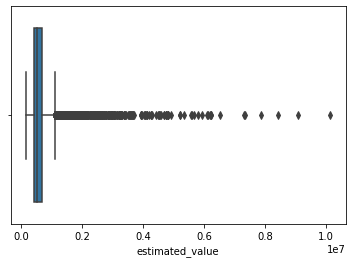

In [ ]:
sns.boxplot(df.estimated_value)

In [ ]:
df=df[df.estimated_value<=1000000]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


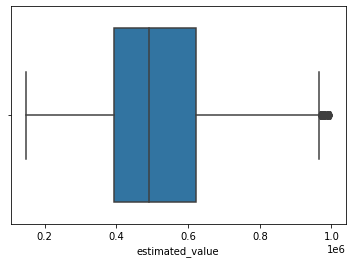

In [ ]:
sns.boxplot(df.estimated_value)

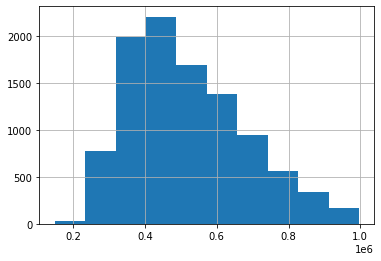

In [ ]:
df.estimated_value.hist()

In [ ]:
#filer out noise, slice df
df[(df.estimated_value<=1000000) & (df.yearBuilt>2013) & (df.zipcode==80209)]

id              address    city state  zipcode   latitude  \
13276   39512040        764 S York St  Denver    CO    80209  39.702607   
13316   11586398        450 S Vine St  Denver    CO    80209  39.708351   
13428   11586742    636 S Williams St  Denver    CO    80209  39.704969   
13431  184305844        456 S High St  Denver    CO    80209  39.708197   
13766    7652681    408 S Franklin St  Denver    CO    80209  39.709074   
13812   39708952  611 S Washington St  Denver    CO    80209  39.705403   
14162   30566405    876 S Williams St  Denver    CO    80209  39.700646   
14982   43208991   731 S Elizabeth St  Denver    CO    80209  39.703135   

        longitude  bedrooms  bathrooms  rooms  squareFootage  lotSize  \
13276 -104.960243         3        4.0      7           2567     6250   
13316 -104.962546         3        5.0      7           2570     4680   
13428 -104.966025         3        5.0      6           2578     4680   
13431 -104.964857         3        5.0     10           3346     6240   
13766 -104.968369         3        5.0      8           3367     5060   
13812 -104.979580         3        4.0     10           2090     4690   
14162 -104.966016         3        1.0      8           3394     6250   
14982 -104.956141         2        3.0      6           2680     6160   

       yearBuilt lastSaleDate  lastSaleAmount priorSaleDate  priorSaleAmount  \
13276     2016.0   2012-07-23          420000    2010-11-29         385000.0   
13316     2016.0   2015-02-11          571000    2007-01-03         399000.0   
13428     2016.0   2015-07-22          637600    2007-02-02         481900.0   
13431     2016.0   2016-01-11          725000    1993-07-15         124000.0   
13766     2015.0   2014-04-21          513486    2007-08-22         435000.0   
13812     2014.0   2015-03-09          825000    2013-07-19         325500.0   
14162     2015.0   2014-03-18          675000    2006-05-11         511000.0   
14982     2016.0   2015-03-31          485000    2003-06-19         357500.0   

       estimated_value  
13276           770622  
13316           682810  
13428           745777  
13431           751361  
13766           709102  
13812           994114  
14162           869769  
14982           753935

#Statistics

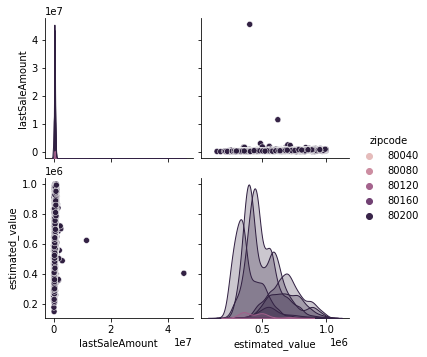

In [ ]:
sns.pairplot(df[['lastSaleAmount','estimated_value','zipcode']],hue = 'zipcode')

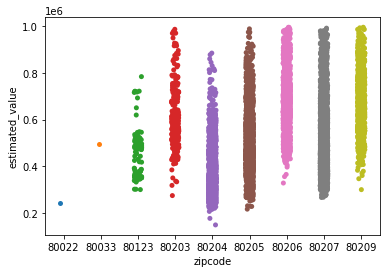

In [ ]:
sns.stripplot(x=df.zipcode, y=df.estimated_value)

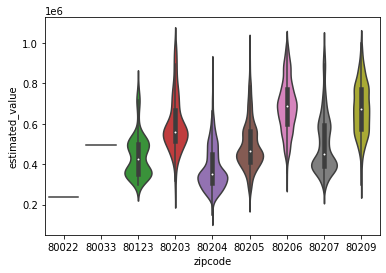

In [ ]:
sns.violinplot(x=df.zipcode, y=df.estimated_value)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10080 entries, 0 to 14996
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               10080 non-null  int64  
 1   address          10080 non-null  object 
 2   city             10080 non-null  object 
 3   state            10080 non-null  object 
 4   zipcode          10080 non-null  int64  
 5   latitude         10080 non-null  float64
 6   longitude        10080 non-null  float64
 7   bedrooms         10080 non-null  int64  
 8   bathrooms        10080 non-null  float64
 9   rooms            10080 non-null  int64  
 10  squareFootage    10080 non-null  int64  
 11  lotSize          10080 non-null  int64  
 12  yearBuilt        10080 non-null  float64
 13  lastSaleDate     10080 non-null  object 
 14  lastSaleAmount   10080 non-null  int64  
 15  priorSaleDate    10080 non-null  object 
 16  priorSaleAmount  10080 non-null  float64
 17  estimated_va

In [ ]:
df['priorSaleDate'] = pd.to_datetime(df.priorSaleDate)

In [ ]:
df['lastSaleDate'] = pd.to_datetime(df.lastSaleDate)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10080 entries, 0 to 14996
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               10080 non-null  int64         
 1   address          10080 non-null  object        
 2   city             10080 non-null  object        
 3   state            10080 non-null  object        
 4   zipcode          10080 non-null  int64         
 5   latitude         10080 non-null  float64       
 6   longitude        10080 non-null  float64       
 7   bedrooms         10080 non-null  int64         
 8   bathrooms        10080 non-null  float64       
 9   rooms            10080 non-null  int64         
 10  squareFootage    10080 non-null  int64         
 11  lotSize          10080 non-null  int64         
 12  yearBuilt        10080 non-null  float64       
 13  lastSaleDate     10080 non-null  datetime64[ns]
 14  lastSaleAmount   10080 non-null  int64

In [ ]:
df["week_daylastSaleDate"] = df.lastSaleDate.dt.weekday
df['year_priorSaleDate'] = df.priorSaleDate.dt.year
df["year_lastSaleDate"] = df.lastSaleDate.dt.year
df["year_between_last_sales"] = df.year_lastSaleDate-df.year_priorSaleDate

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10080 entries, 0 to 14996
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       10080 non-null  int64         
 1   address                  10080 non-null  object        
 2   city                     10080 non-null  object        
 3   state                    10080 non-null  object        
 4   zipcode                  10080 non-null  int64         
 5   latitude                 10080 non-null  float64       
 6   longitude                10080 non-null  float64       
 7   bedrooms                 10080 non-null  int64         
 8   bathrooms                10080 non-null  float64       
 9   rooms                    10080 non-null  int64         
 10  squareFootage            10080 non-null  int64         
 11  lotSize                  10080 non-null  int64         
 12  yearBuilt                10080 n

In [ ]:
df.head(2)

id              address    city state  zipcode  latitude  \
0   39525749      8171 E 84th Ave  Denver    CO    80022  39.84916   
3  155129946  3040 Wadsworth Blvd  Denver    CO    80033  39.76078   

    longitude  bedrooms  bathrooms  rooms  ...  yearBuilt  lastSaleDate  \
0 -104.893468         3        2.0      6  ...     2003.0    2009-12-17   
3 -105.081060         4        3.0      0  ...     1956.0    2008-12-02   

   lastSaleAmount priorSaleDate  priorSaleAmount estimated_value  \
0           75000    2004-05-13         165700.0          239753   
3          185000    2008-06-27              0.0          494073   

   week_daylastSaleDate  year_priorSaleDate  year_lastSaleDate  \
0                     3                2004               2009   
3                     1                2008               2008   

   year_between_last_sales  
0                        5  
3                        0  

[2 rows x 22 columns]

In [ ]:
pd.to_datetime

<function pandas.core.tools.datetimes.to_datetime>

In [ ]:
df.corr().loc["estimated_value", :].sort_values(ascending = False)

estimated_value            1.000000
squareFootage              0.690945
bathrooms                  0.652591
rooms                      0.581398
priorSaleAmount            0.566327
bedrooms                   0.358154
lastSaleAmount             0.258833
longitude                  0.234867
id                         0.155242
zipcode                    0.109972
year_between_last_sales    0.089481
year_lastSaleDate          0.042969
week_daylastSaleDate       0.000469
year_priorSaleDate        -0.058554
lotSize                   -0.072603
latitude                  -0.199005
yearBuilt                 -0.255941
Name: estimated_value, dtype: float64

#Practical examples of Data Mining 

In [ ]:
df.groupby(["zipcode", "yearBuilt"]).estimated_value.median().head(10)

zipcode  yearBuilt
80022    2003.0       239753.0
80033    1956.0       494073.0
80123    1959.0       378509.0
         1960.0       370857.0
         1961.0       348035.0
         1962.0       331915.0
         1964.0       377254.0
         1977.0       348776.0
         1978.0       350987.0
         1979.0       357373.0
Name: estimated_value, dtype: float64

In [ ]:
df.groupby("zipcode").estimated_value.mean().reset_index()

zipcode  estimated_value
0    80022    239753.000000
1    80033    494073.000000
2    80123    442041.557377
3    80203    597057.185039
4    80204    382170.764015
5    80205    493931.957111
6    80206    687471.786271
7    80207    502097.067866
8    80209    675948.477064

In [ ]:
df2 = df.groupby("zipcode").estimated_value.mean().reset_index()

In [ ]:
df2.columns=['zipcode','median_value']

In [ ]:
#merging 
pd.merge(df, df2, on ="zipcode", how="left")

id              address    city state  zipcode   latitude  \
0       39525749      8171 E 84th Ave  Denver    CO    80022  39.849160   
1      155129946  3040 Wadsworth Blvd  Denver    CO    80033  39.760780   
2         245107      5615 S Eaton St  Denver    CO    80123  39.616181   
3        3523925     6535 W Sumac Ave  Denver    CO    80123  39.615136   
4       30560679     6673 W Berry Ave  Denver    CO    80123  39.616350   
...          ...                  ...     ...   ...      ...        ...   
10075   23766957  421 S Washington St  Denver    CO    80209  39.708869   
10076    4511745     255 S Downing St  Denver    CO    80209  39.711870   
10077   42985979    1016 S Emerson St  Denver    CO    80209  39.698090   
10078  150304831        376 S High St  Denver    CO    80209  39.709681   
10079   21721153     214 S Lincoln St  Denver    CO    80209  39.712608   

        longitude  bedrooms  bathrooms  rooms  ...  lastSaleDate  \
0     -104.893468         3        2.0      6  ...    2009-12-17   
1     -105.081060         4        3.0      0  ...    2008-12-02   
2     -105.058812         3        4.0      8  ...    2012-07-18   
3     -105.069018         3        5.0      7  ...    2006-09-12   
4     -105.070760         4        4.0      8  ...    2014-12-15   
...           ...       ...        ...    ...  ...           ...   
10075 -104.979540         2        2.0      6  ...    2008-07-08   
10076 -104.973735         2        2.0      5  ...    2009-10-06   
10077 -104.976608         3        2.0      6  ...    2017-05-31   
10078 -104.964860         3        2.0      7  ...    2015-09-10   
10079 -104.986000         3        3.0     11  ...    2015-03-05   

       lastSaleAmount  priorSaleDate priorSaleAmount  estimated_value  \
0               75000     2004-05-13        165700.0           239753   
1              185000     2008-06-27             0.0           494073   
2              308000     2011-12-29             0.0           513676   
3              363500     2005-05-16        339000.0           496062   
4              420000     2006-07-07        345000.0           514953   
...               ...            ...             ...              ...   
10075          385000     1998-01-30        182900.0           629031   
10076          385000     2005-08-03        360000.0           638952   
10077          600000     2013-06-07        535000.0           694981   
10078          815000     1994-05-06        142000.0           784955   
10079          645000     2012-07-23        557500.0           807306   

      week_daylastSaleDate  year_priorSaleDate  year_lastSaleDate  \
0                        3                2004               2009   
1                        1                2008               2008   
2                        2                2011               2012   
3                        1                2005               2006   
4                        0                2006               2014   
...                    ...                 ...                ...   
10075                    1                1998               2008   
10076                    1                2005               2009   
10077                    2                2013               2017   
10078                    3                1994               2015   
10079                    3                2012               2015   

       year_between_last_sales   median_value  
0                            5  239753.000000  
1                            0  494073.000000  
2                            1  442041.557377  
3                            1  442041.557377  
4                            8  442041.557377  
...                        ...            ...  
10075                       10  675948.477064  
10076                        4  675948.477064  
10077                        4  675948.477064  
10078                       21  675948.477064  
10079                        3  675948.477064  

[10080 rows x

#Dataset Examples

Kaggle
Reddit
Sklearn
Google

#Cluster analysis

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
df.describe()


id       zipcode      latitude     longitude      bedrooms  \
count  1.008000e+04  10080.000000  10080.000000  10080.000000  10080.000000   
mean   4.169436e+07  80204.794048     39.743366   -104.964296      2.593056   
std    5.496861e+07      9.516981      0.022711      0.041141      0.789020   
min    1.433670e+05  80022.000000     39.614539   -105.108407      0.000000   
25%    7.648809e+06  80205.000000     39.730591   -104.980214      2.000000   
50%    1.983419e+07  80206.000000     39.750796   -104.957685      2.000000   
75%    4.383447e+07  80207.000000     39.759383   -104.934227      3.000000   
max    2.515274e+08  80209.000000     39.849160   -104.893468      9.000000   

          bathrooms         rooms  squareFootage       lotSize     yearBuilt  \
count  10080.000000  10080.000000   10080.000000  10080.000000  10080.000000   
mean       1.981895      5.805456    1303.269742   5451.996925   1926.682738   
std        0.844782      1.516111     482.778156   1691.248787     27.167349   
min        0.000000      0.000000     350.000000    832.000000   1874.000000   
25%        1.000000      5.000000     959.000000   4460.000000   1906.000000   
50%        2.000000      6.000000    1175.000000   5940.000000   1925.000000   
75%        2.000000      7.000000    1556.000000   6250.000000   1949.000000   
max       11.000000     21.000000    4695.000000  20223.000000   2016.000000   

       lastSaleAmount  priorSaleAmount  estimated_value  week_daylastSaleDate  \
count    1.008000e+04     1.008000e+04     10080.000000          10080.000000   
mean     3.471972e+05     2.144274e+05    517858.492262              1.965675   
std      4.972707e+05     1.669564e+05    161473.908059              1.430887   
min      5.000000e+02     0.000000e+00    147767.000000              0.000000   
25%      2.110000e+05     1.090000e+05    392722.500000              1.000000   
50%      3.250000e+05     1.999000e+05    489844.500000              2.000000   
75%      4.390000e+05     3.050000e+05    621846.000000              3.000000   
max      4.560000e+07     4.475900e+06    996677.000000              6.000000   

       year_priorSaleDate  year_lastSaleDate  year_between_last_sales  
count        10080.000000       10080.000000             10080.000000  
mean          2006.328571        2011.384623                 5.056052  
std              6.240236           4.470070                 6.229969  
min           1967.000000        1998.000000                -4.000000  
25%           2003.000000        2008.000000                 1.000000  
50%           2007.000000        2013.000000                 3.000000  
75%           2011.000000        2015.000000                 7.000000  
max           2017.000000        2017.000000                50.000000

In [ ]:
X=df.drop("estimated_value", axis=1)

In [ ]:
type(X)

pandas.core.frame.DataFrame

In [ ]:
X=X[["bedrooms",	"bathrooms",	"rooms",	"squareFootage",	"lotSize",	"yearBuilt","priorSaleAmount"]]

In [ ]:
X.fillna(0, inplace=True)

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)

In [ ]:
kmeans

KMeans(n_clusters=5, random_state=0)

In [ ]:
len(kmeans.labels_), X.shape


(10080, (10080, 7))

In [ ]:
kmeans.cluster_centers_.shape

(5, 7)

In [ ]:
kmeans.cluster_centers_[0]

array([2.68841083e+00, 2.25503123e+00, 6.19882026e+00, 1.43586468e+03,
       5.22312942e+03, 1.92162422e+03, 3.18644888e+05])

In [ ]:
labels=kmeans.labels_

In [ ]:
X["cluster"]=labels

In [ ]:
X.head(10)

bedrooms  bathrooms  rooms  squareFootage  lotSize  yearBuilt  \
0          3        2.0      6           1378     9968     2003.0   
3          4        3.0      0           2400    11500     1956.0   
4          3        4.0      8           2305     5600     1998.0   
5          3        5.0      7           2051     6045     1996.0   
6          4        4.0      8           2051     6315     1997.0   
7          3        3.0      7           2051     8133     1997.0   
8          3        3.0      7           1796     5038     1999.0   
9          3        3.0      0           2054     4050     2007.0   
10         3        4.0      7           2568     6397     2000.0   
11         3        2.0      6           1290     9000     1962.0   

    priorSaleAmount  cluster  
0          165700.0        1  
3               0.0        3  
4               0.0        3  
5          339000.0        0  
6          345000.0        0  
7          225200.0        1  
8               0.0        3  
9          312000.0        0  
10         530000.0        4  
11         171000.0        1

In [ ]:
X.groupby("cluster").mean() #you can ggroup into min and max value as well

bedrooms  bathrooms     rooms  squareFootage      lotSize  \
cluster                                                              
0        2.688303   2.254773  6.198889    1435.787227  5223.770219   
1        2.525862   1.807471  5.508098    1194.024033  5482.339864   
2        2.857143   2.285714  6.571429    1823.142857  7136.285714   
3        2.483845   1.665235  5.391002    1157.602045  5667.784458   
4        2.862894   2.693145  6.907508    1726.477693  5454.149075   

           yearBuilt  priorSaleAmount  
cluster                                
0        1921.596668     3.186697e+05  
1        1929.542842     1.760458e+05  
2        1928.142857     3.092914e+06  
3        1930.377096     3.314521e+04  
4        1920.873776     5.078862e+05

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
for i in range (3, 10):
  kmeans=KMeans(n_clusters=i).fit(X)
  labels = kmeans.labels_
  print (silhouette_score(X, labels ))
  #print kmeans.cluster_centers_


0.5680313250174545
0.5426677422424114
0.5618215855619032
0.556009106238137
0.5626615775348713
0.566456042791487
0.564671762774389


#classification and regression

In [ ]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
X.head(2)

bedrooms  bathrooms  rooms  squareFootage  lotSize  yearBuilt  \
0         3        2.0      6           1378     9968     2003.0   
3         4        3.0      0           2400    11500     1956.0   

   priorSaleAmount  cluster  
0         165700.0        1  
3              0.0        3

In [ ]:
y=df.estimated_value

In [ ]:
y  #Numerical value

0        239753
3        494073
4        513676
5        496062
6        514953
          ...  
14989    629031
14990    638952
14993    694981
14994    784955
14996    807306
Name: estimated_value, Length: 10080, dtype: int64

In [ ]:
lg = LinearRegression()
lg.fit(X,y)
lg.score(X,y)

0.6822476648431439

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X,y)


In [ ]:
X_train.shape, y_train.shape

((7560, 8), (7560,))

In [ ]:
lg = LinearRegression()
lg.fit(X_train,y_train)
lg.score(X_test,y_test)

0.6193201375602297

In [ ]:
df["estimated_value_bins"]=df.estimated_value.apply(lambda x: "high" if x>500000 else "low")

In [ ]:
df.estimated_value_bins.value_counts()

low     5216
high    4864
Name: estimated_value_bins, dtype: int64

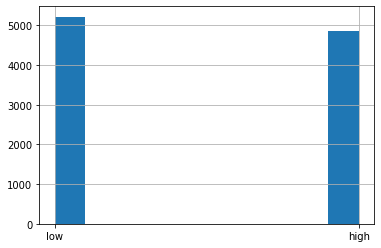

In [ ]:
df.estimated_value_bins.hist()

In [ ]:
y2=df.estimated_value_bins

In [ ]:
log=LogisticRegression()
X_train, X_test, y2_train, y2_test= train_test_split(X,y2)
log.fit(X_train, y2_train)
log.score(X_test, y2_test)

0.8337301587301588

In [ ]:
y_pred=log.predict(X_test)

In [ ]:
np.array(y2_test)

array(['low', 'low', 'low', ..., 'low', 'low', 'low'], dtype=object)

In [ ]:
confusion_matrix(y2_test, y_pred)

array([[ 972,  229],
       [ 190, 1129]])

#Support Vector Machine

In [ ]:
svr = SVR()
svr.fit(X_train, y_train)
svr.score(X_test, y_test )

-0.04404206621346418

In [ ]:
svc = SVC()
svc.fit(X_train, y2_train)
svc.score(X_test, y2_test)

0.7912698412698412

In [ ]:
y2_pred=svc.predict(X_test)

In [ ]:
confusion_matrix(y2_test, y2_pred)

array([[ 832,  369],
       [ 157, 1162]])

In [ ]:
knnr=KNeighborsRegressor()
knnr.fit(X_train, y_train)
knnr.score(X_test,y_test)

-0.15941647722057484

In [ ]:
knnc=KNeighborsClassifier()
knnc.fit(X_train, y2_train)
knnc.score(X_train, y2_train)

0.862037037037037

In [ ]:
y2_pred=knnc.predict(X_test)
confusion_matrix(y2_test,y2_pred)

array([[ 931,  270],
       [ 194, 1125]])

#Association, Correlation and Covariance

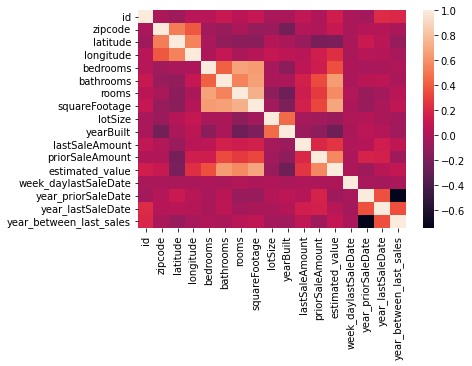

In [ ]:
sns.heatmap(df.corr())

In [ ]:
df.cov()

id       zipcode      latitude  \
id                       3.021548e+15 -5.617630e+06 -60992.895138   
zipcode                 -5.617630e+06  9.057292e+01      0.113617   
latitude                -6.099290e+04  1.136174e-01      0.000516   
longitude                1.099351e+05  1.532964e-01      0.000512   
bedrooms                 1.738008e+06 -3.500165e-01     -0.000315   
bathrooms                5.087272e+06 -6.408459e-01     -0.001882   
rooms                    4.590194e+06 -4.969467e-02     -0.004326   
squareFootage            2.617412e+09 -4.003407e+02     -1.516513   
lotSize                 -1.751765e+09 -1.205270e+03      1.041180   
yearBuilt               -8.486537e+06 -5.841399e+01     -0.005666   
lastSaleAmount           2.212316e+12  1.031264e+05   -801.542955   
priorSaleAmount          1.325445e+11  1.703101e+04   -782.699168   
estimated_value          1.377924e+12  1.689981e+05   -729.799293   
week_daylastSaleDate    -1.855648e+05 -4.844325e-02     -0.000390   
year_priorSaleDate      -1.425652e+07  1.941176e+00      0.016949   
year_lastSaleDate        5.356827e+07  1.231320e+00      0.004860   
year_between_last_sales  6.782480e+07 -7.098558e-01     -0.012089   

                             longitude      bedrooms     bathrooms  \
id                       109935.115766  1.738008e+06  5.087272e+06   
zipcode                       0.153296 -3.500165e-01 -6.408459e-01   
latitude                      0.000512 -3.152241e-04 -1.882492e-03   
longitude                     0.001693 -1.185904e-05  3.417943e-03   
bedrooms                     -0.000012  6.225532e-01  2.777788e-01   
bathrooms                     0.003418  2.777788e-01  7.136567e-01   
rooms                        -0.000693  8.094039e-01  7.051291e-01   
squareFootage                 0.554515  2.483063e+02  2.713057e+02   
lotSize                       7.432522 -2.082256e+01 -1.918931e+01   
yearBuilt                     0.078589 -2.796548e+00 -3.176804e-01   
lastSaleAmount             1018.851260  2.700257e+04  6.897107e+04   
priorSaleAmount            1057.428405  1.809632e+04  4.828790e+04   
estimated_value            1560.273672  4.563106e+04  8.902006e+04   
week_daylastSaleDate         -0.000397  5.972539e-03 -4.094095e-03   
year_priorSaleDate            0.010940 -1.000298e-01  3.042925e-01   
year_lastSaleDate             0.007219 -4.507157e-02  2.655217e-01   
year_between_last_sales      -0.003721  5.495819e-02 -3.877077e-02   

                                rooms  squareFootage       lotSize  \
id                       4.590194e+06   2.617412e+09 -1.751765e+09   
zipcode                 -4.969467e-02  -4.003407e+02 -1.205270e+03   
latitude                -4.325545e-03  -1.516513e+00  1.041180e+00   
longitude               -6.927081e-04   5.545145e-01  7.432522e+00   
bedrooms                 8.094039e-01   2.483063e+02 -2.082256e+01   
bathrooms                7.051291e-01   2.713057e+02 -1.918931e+01   
rooms                    2.298591e+00   5.360090e+02 -3.011851e+02   
squareFootage            5.360090e+02   2.330747e+05 -3.741579e+04   
lotSize                 -3.011851e+02  -3.741579e+04  2.860322e+06   
yearBuilt               -1.036196e+01  -2.483134e+03  2.109140e+04   
lastSaleAmount           1.045593e+05   3.982398e+07 -2.213973e+07   
priorSaleAmount          7.112842e+04   2.681910e+07 -1.328492e+07   
estimated_value          1.423335e+05   5.386340e+07 -1.982732e+07   
week_daylastSaleDate     4.362416e-02   1.492542e+00  1.723732e+01   
year_priorSaleDate      -7.428982e-01  -2.336767e+02  3.375897e+02   
year_lastSaleDate       -2.407733e-01  -1.074777e+01 -5.211421e+01   
year_between_last_sales  5.021249e-01   2.229289e+02 -3.897039e+02   

                            yearBuilt  lastSaleAmount  priorSaleAmount  \
id                      -8.486537e+06    2.212316e+12     1.325445e+11   
zipcode                 -5.841399e+01    1.031264e+05     1.703101e+04   
latitude                -5.665539e-03   -8.01543

In [ ]:
X

bedrooms  bathrooms  rooms  squareFootage  lotSize  yearBuilt  \
0             3        2.0      6           1378     9968     2003.0   
3             4        3.0      0           2400    11500     1956.0   
4             3        4.0      8           2305     5600     1998.0   
5             3        5.0      7           2051     6045     1996.0   
6             4        4.0      8           2051     6315     1997.0   
...         ...        ...    ...            ...      ...        ...   
14989         2        2.0      6           1145     4690     1924.0   
14990         2        2.0      5           1401     4690     1910.0   
14993         3        2.0      6           1913     4760     1909.0   
14994         3        2.0      7           1913     4990     1925.0   
14996         3        3.0     11           2937     4500     1890.0   

       priorSaleAmount  cluster  
0             165700.0        1  
3                  0.0        3  
4                  0.0        3  
5             339000.0        0  
6             345000.0        0  
...                ...      ...  
14989         182900.0        1  
14990         360000.0        0  
14993         535000.0        4  
14994         142000.0        1  
14996         557500.0        4  

[10080 rows x 8 columns]

In [ ]:
X.columns

Index(['bedrooms', 'bathrooms', 'rooms', 'squareFootage', 'lotSize',
       'yearBuilt', 'priorSaleAmount', 'cluster'],
      dtype='object')

====
bedrooms
mean: 2.5930555555555554
std: 0.7890204170127862


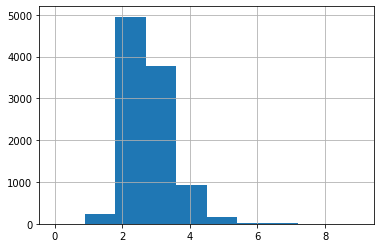

====
bathrooms
mean: 1.9818948412698412
std: 0.8447820387405519


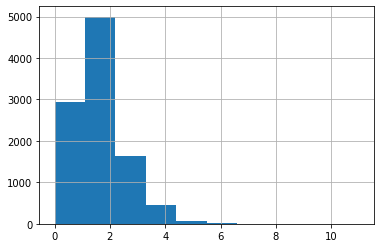

====
rooms
mean: 5.80545634920635
std: 1.5161105237513364


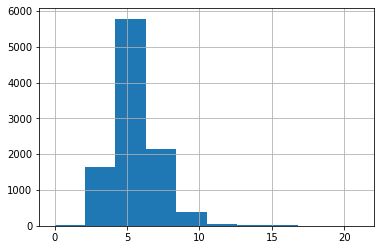

====
squareFootage
mean: 1303.269742063492
std: 482.7781563471877


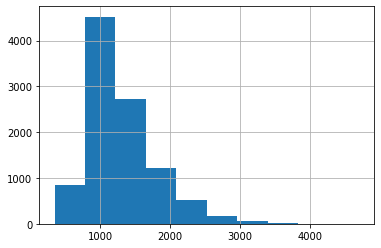

====
lotSize
mean: 5451.996924603174
std: 1691.248786686502


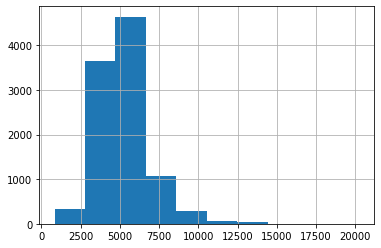

====
yearBuilt
mean: 1926.6827380952382
std: 27.167348554939316


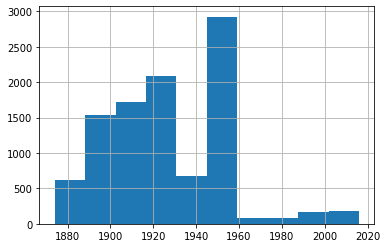

====
priorSaleAmount
mean: 214427.44553571427
std: 166956.44577454453


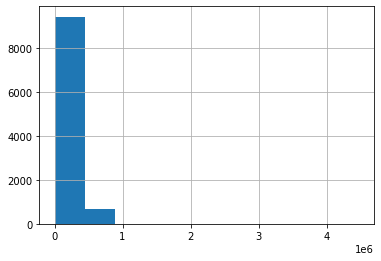

====
cluster
mean: 1.4735119047619047
std: 1.361342013034624


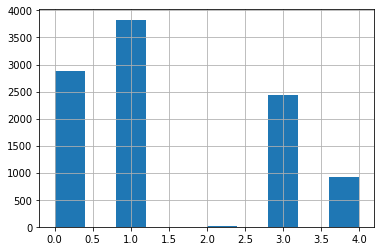

In [ ]:
for i in X.columns:
  print('====')
  print (i)
  X.loc[:, i].hist()
  print ('mean:' , X.loc[:, i].mean())
  print ('std:' , X.loc[:, i].std())
  plt.show()

In [ ]:
#Outliers
#1. Three Sigma Rule:
#2. Boxplot Rule:

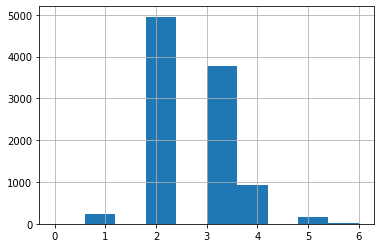

In [ ]:
X2=X[X.bedrooms<7]

X2.bedrooms.hist()

#Dimensionality Reduction

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca=PCA(4)

In [ ]:
X_transformed=pca.fit_transform(X)

In [ ]:
X_transformed.shape

(10080, 4)

In [ ]:
pca.components_

array([[ 6.49216001e-07,  1.73234190e-06,  2.55176150e-06,
         9.62145959e-04, -4.76647728e-04, -1.84943595e-05,
         9.99999423e-01, -1.27275704e-06],
       [-5.03224880e-06,  6.08721474e-07, -9.51812689e-05,
        -9.31032196e-03,  9.99929808e-01,  7.31090573e-03,
         4.85707965e-04,  5.40876397e-05],
       [ 1.11458664e-03,  1.08596977e-03,  2.24628120e-03,
         9.99914145e-01,  9.37433431e-03, -8.68305616e-03,
        -9.57764311e-04,  2.08377778e-04],
       [-6.32567023e-04,  4.49018256e-03, -5.40138288e-03,
         8.75868124e-03, -7.22976026e-03,  9.99910537e-01,
         6.62651034e-06,  4.43880577e-04]])

In [ ]:
lg = LinearRegression()
X_train, X_test, y_train, y_test=train_test_split(X_transformed, y)
lg.fit(X_train, y_train)


LinearRegression()

In [ ]:
lg.score(X_test, y_test)

0.6073579568873244